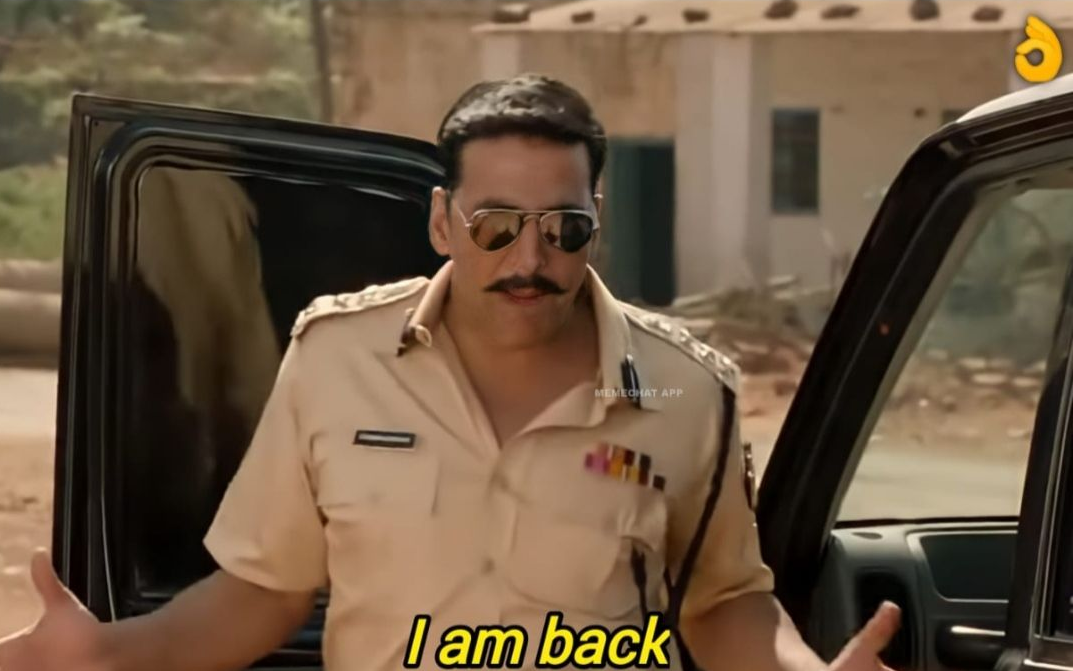

# Naive Bayes Classifier

#### A Naive Bayes classifier is a probabilistic machine learning model

#### It is based on the Bayes Theorum

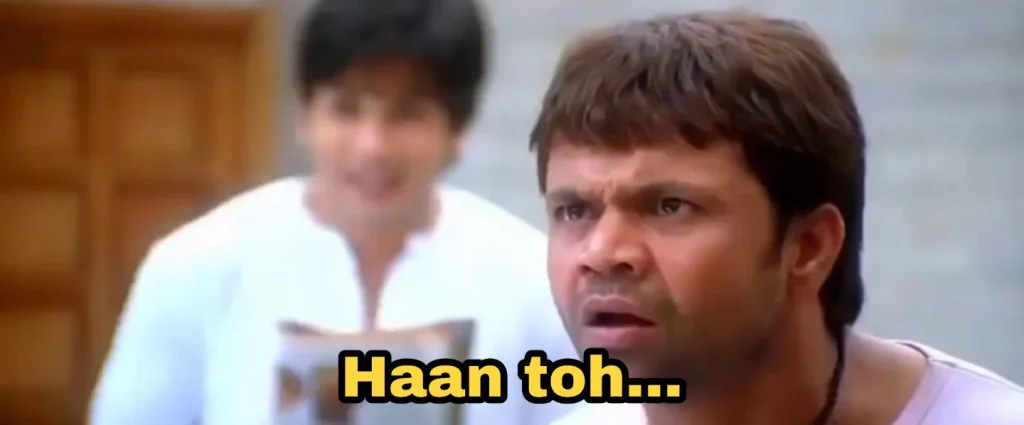

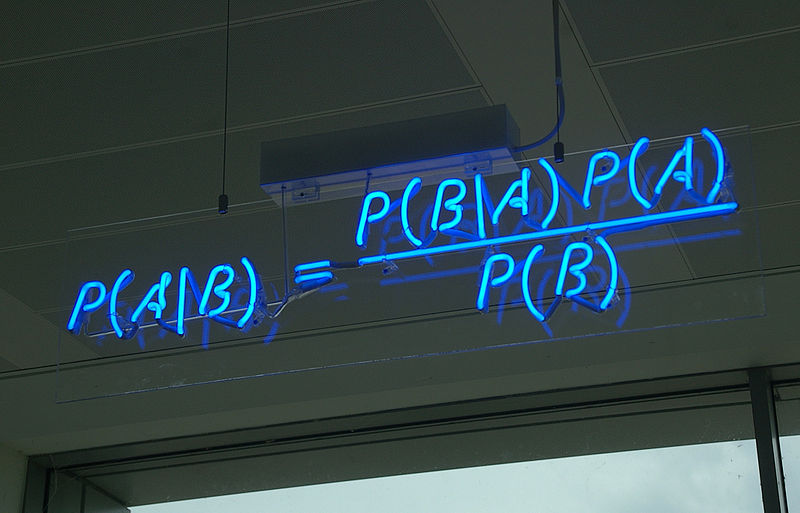

****$P(A|B)$ ==> Probability of A given that B has occured****

****$P(B|A)$ ==> Probability of B given that A has occured****

****$P(A)$ ==> Probability of event A****

****$P(B)$ ==> Probability of event B****

#### Bayes theorem gives us the conditional probability of event A, given that event B has occurred

#### Bayes theorem calculates the conditional probability of the occurrence of an event based on prior knowledge of conditions that might be related to the event

$$
\Large P(label|feature) = \frac{(P(feature|label).P(label))}{P(feature)}
$$

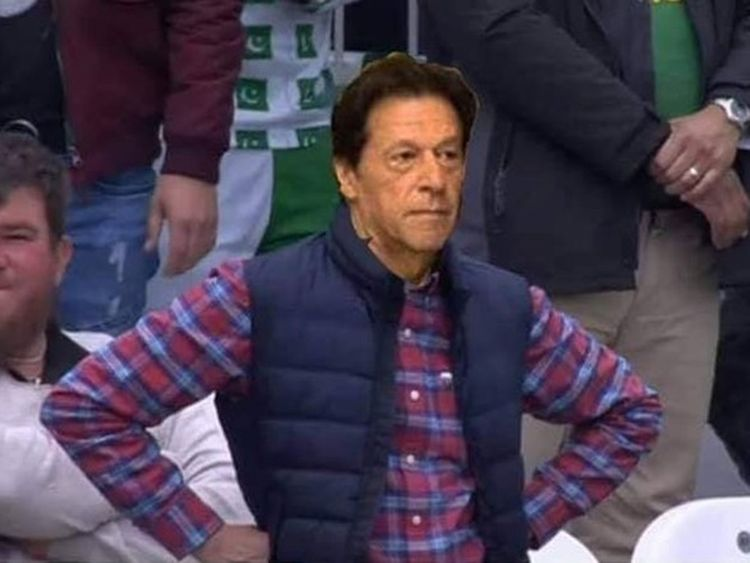

### Why is it called Naive?

#### It is called Naive Bayes or idiot Bayes because the calculations of the probabilities for each class are simplified to make their calculations tractable

#### Let's See an Example

****Let's have a look at number of weather features and target variable "play" which indicates weather you would go out and play football given these features****

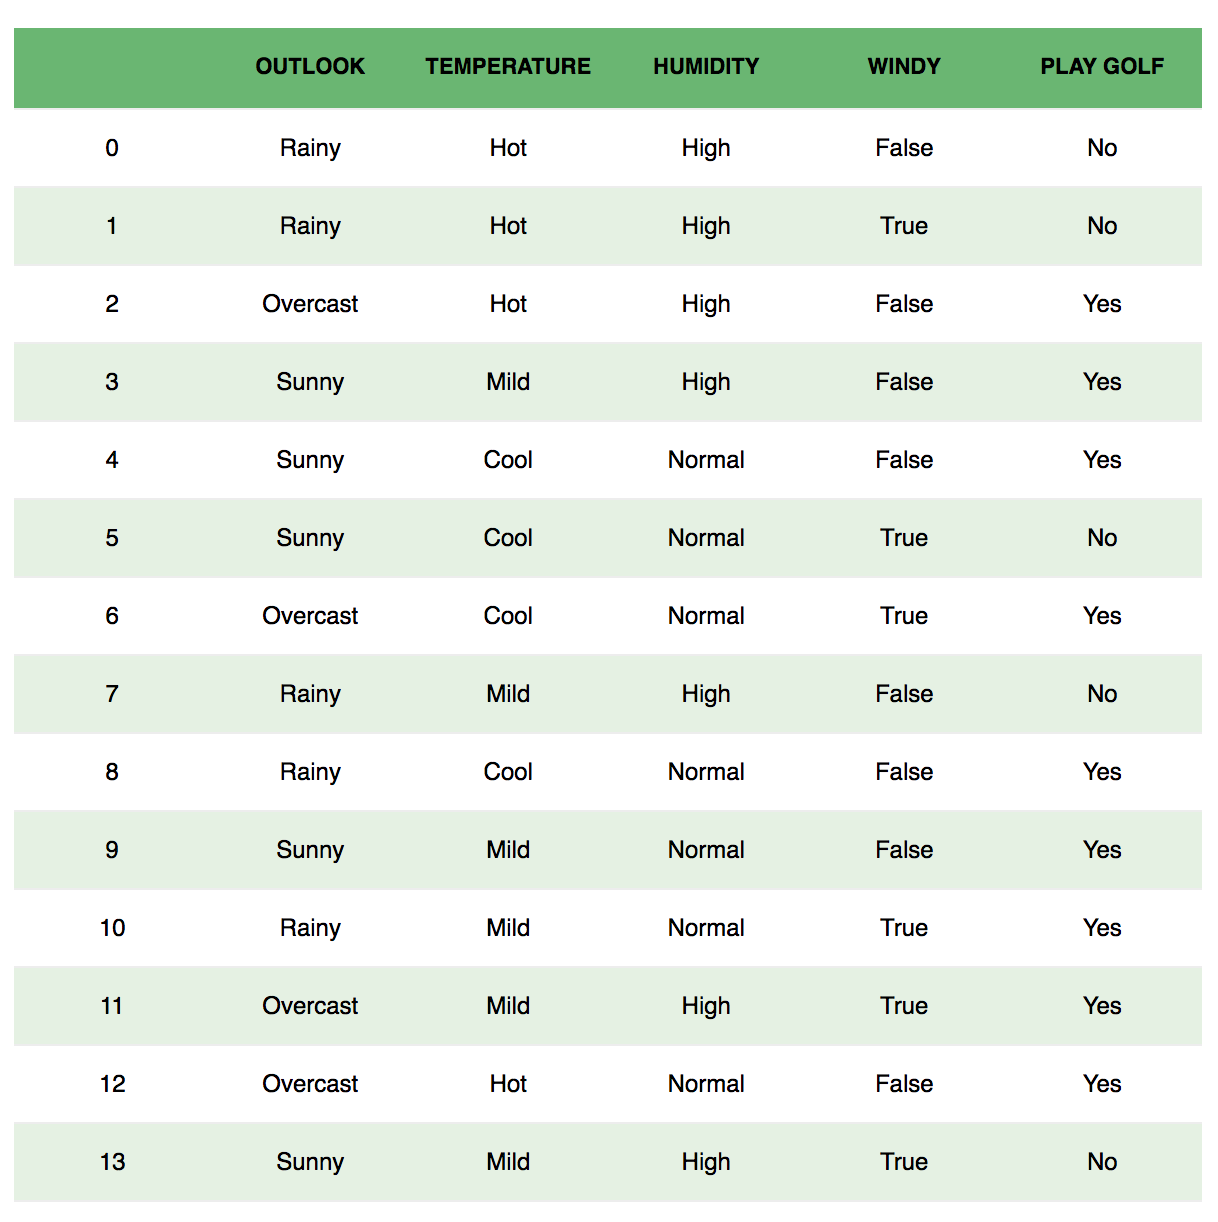

### Assumptions

****There are two assumptions made by the Naive Bayes algorithm****

### 1) The Independence Assumtion

****All the features are independant of each other meaning these feature do not interact with each other****

#### Example

****The temperature being "Hot" has nothing to do with the humidity being "high"****

****or****

****The outlook being "Rainy" has no effect on the winds. Hence, the features are assumed to be independent****

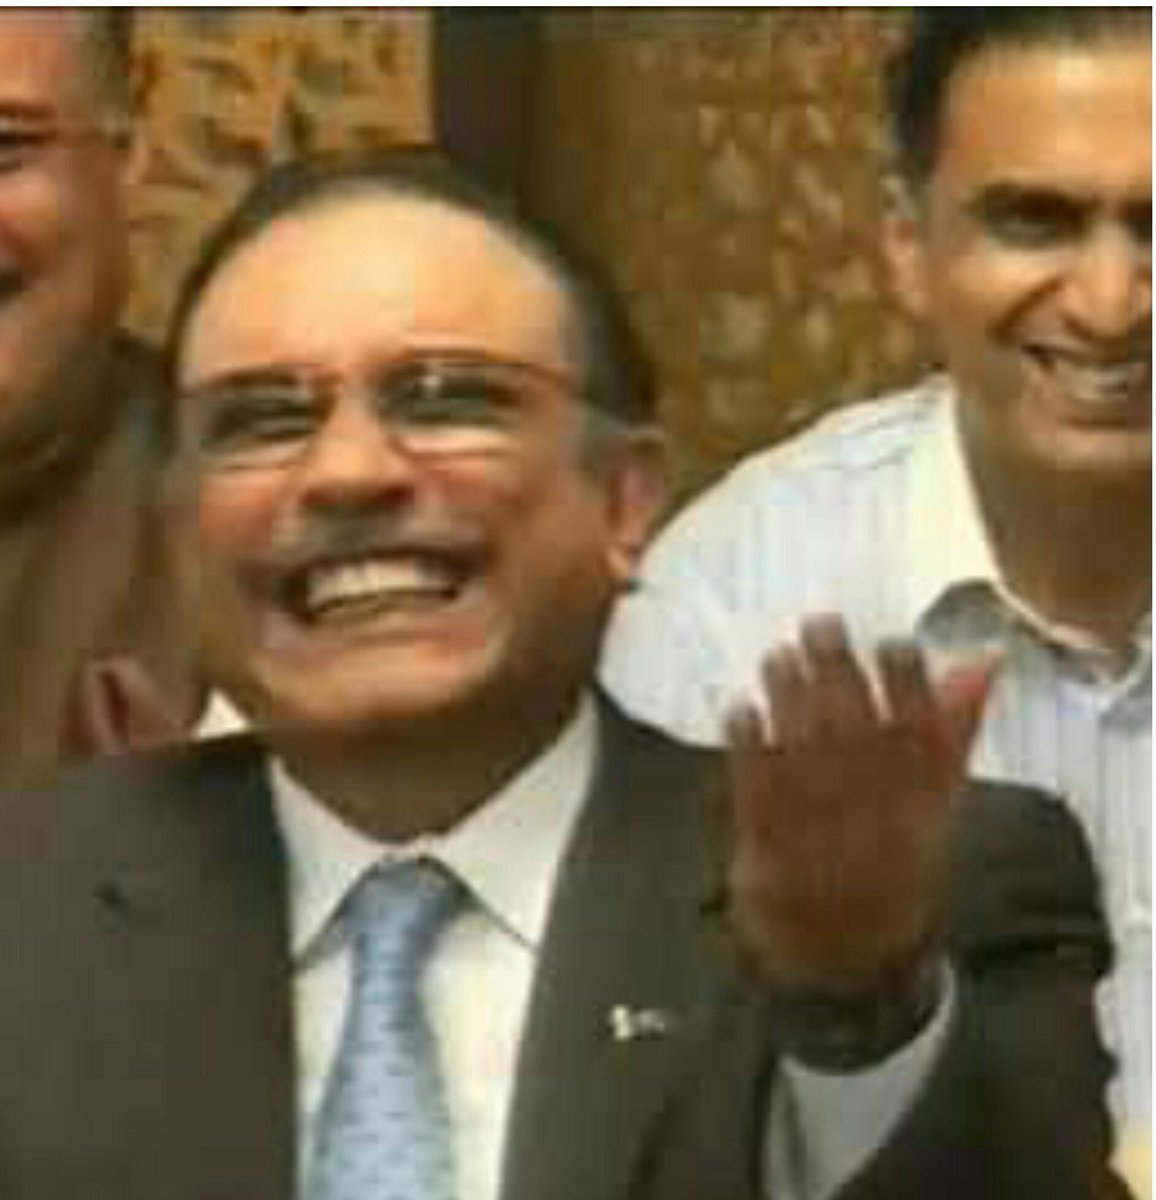

### 2) The Equality

****Each feautre is given the same importance/weight aka Identical assumption****

****For example, knowing only temperature and humidity alone can’t predict the outcome accuratey. None of the attributes is irrelevant and assumed to be contributing equally to the outcome****

### The assumptions made by Naive Bayes are not generally correct in real-world situations. In-fact, the independence assumption is never correct but often works well in practice

### Applications of Naive Bayes

* ****categorizing news****

* ****email spam detection****

* ****face recognition****

* ****sentiment analysis****

* ****medical diagnosis****

* ****digit recognition****

* ****weather prediction etc.****

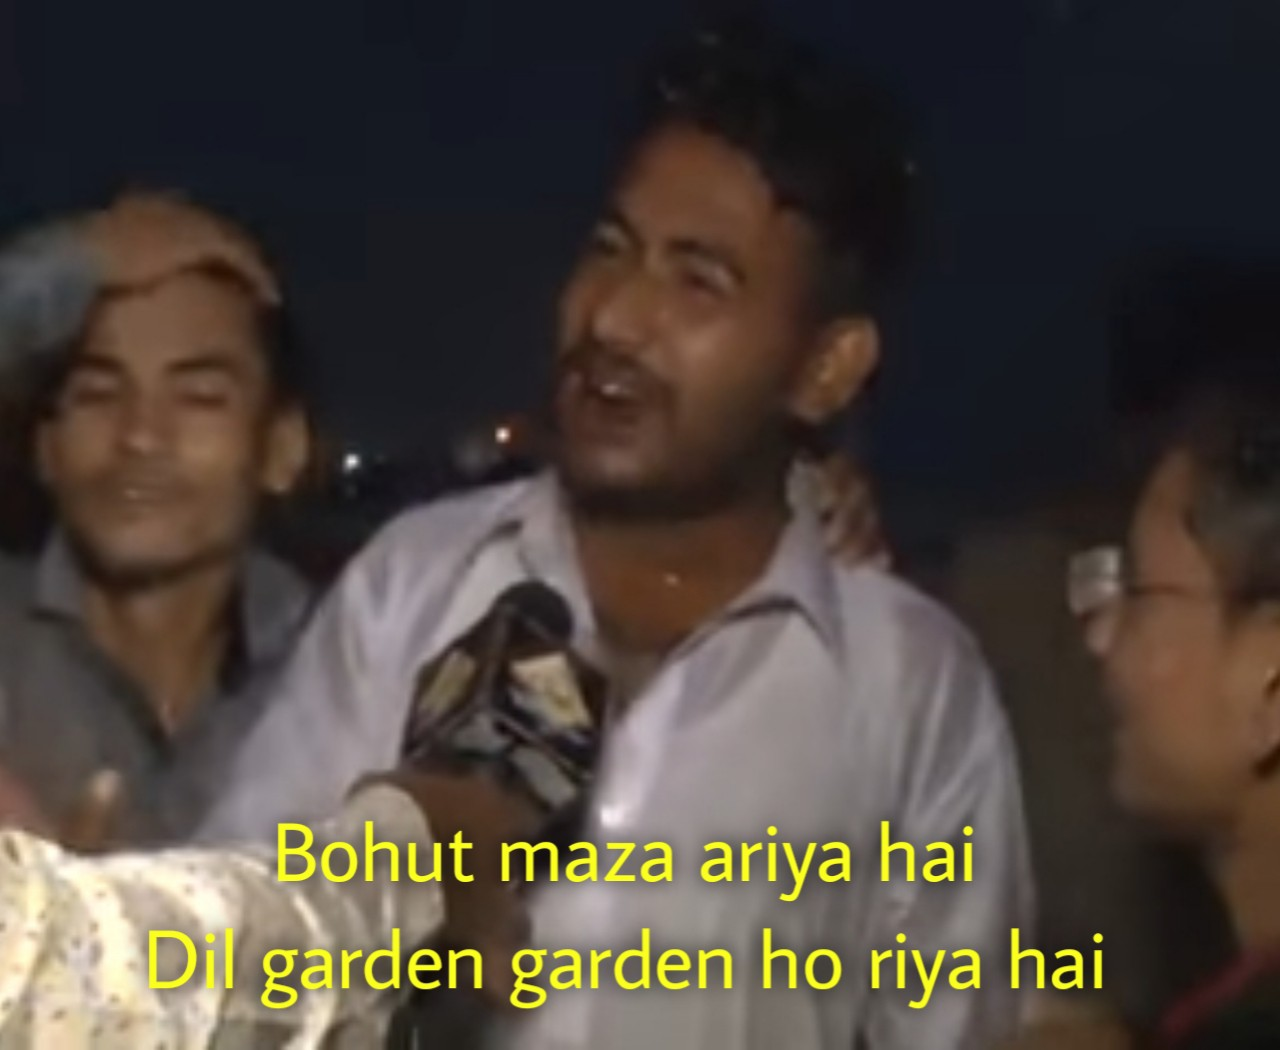

### Let's Write Naive Bayes Theorum in terms of the given data

$$
\Large P(y|X) = \frac{P(X|y).P(y)}{P(X)}\
$$

#### 'y' ==> class variable(play golf) ==> whether to play golf or not given the conditions 

#### 'X' ==> features/attributes

****Where X contains n number of features in the dataset****


$$
\Large X = (x_{1},x_{2},x_{3},.......,x_{n})
$$

#### Substituting the values in the theorum

$$
\Large P(y|x_{1},x_{2},x_{3},.......,x_{n}) = \frac{P(x_{1},x_{2},x_{3},.......,x_{n}|y).P(y)}{P(x_{1},x_{2},x_{3},.......,x_{n})}\
$$

$$
\Large P(y|x_{1},x_{2},x_{3},.......,x_{n}) = \frac{P(x_{1}|y) P(x_{2}|y) P(x_{3}|y)......P(x_{n}|y).P(y)}{P(x_{1})P(x_{2})P(x_{3})......P(x_{n})}\
$$

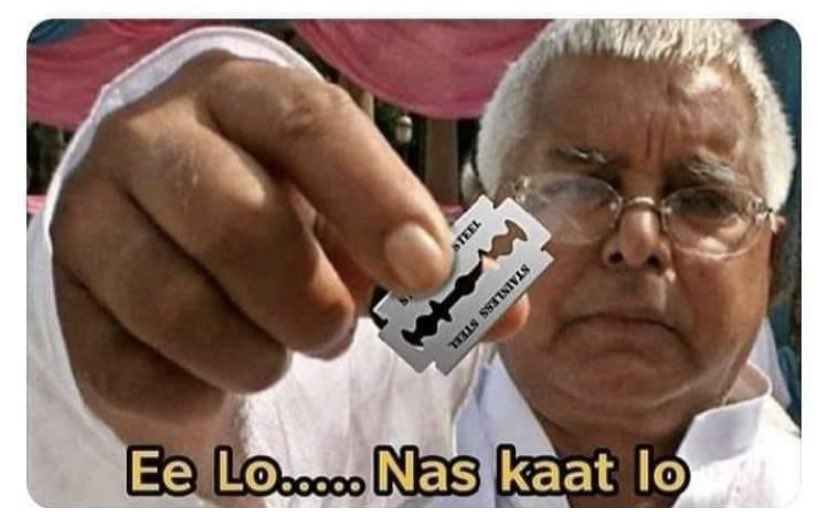

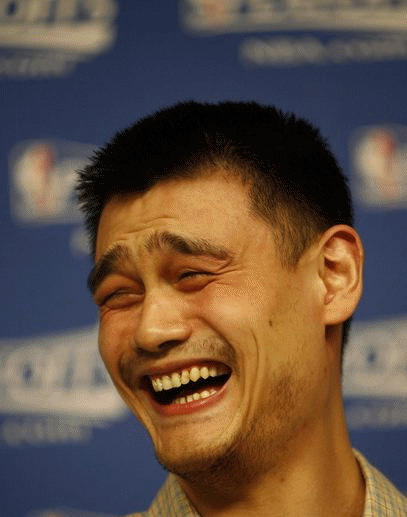

$$
\Large P(y|x_{1},x_{2},x_{3},.......,x_{n}) = \Large{P(y)}\prod\limits _{i=1} ^{n} \frac{P(x_{i}|y)}{P(x_{1})P(x_{2})P(x_{3})......P(x_{n})}\
$$

$$
\Large P(y|x_{1},x_{2},x_{3},.......,x_{n})  \Large ∝ \Large{P(y)}\prod\limits _{i=1} ^{n}{P(x_{i}|y)}\
$$

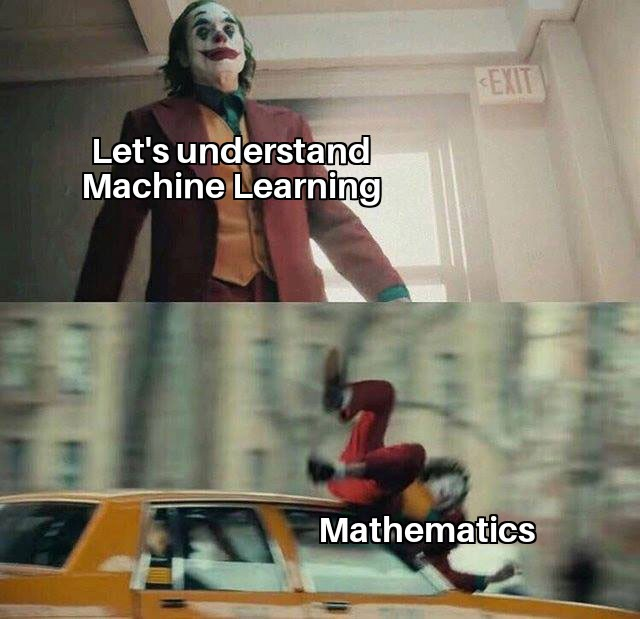

### Using the above function, we can obtain the class, given the features

## Let's Work on Real Data

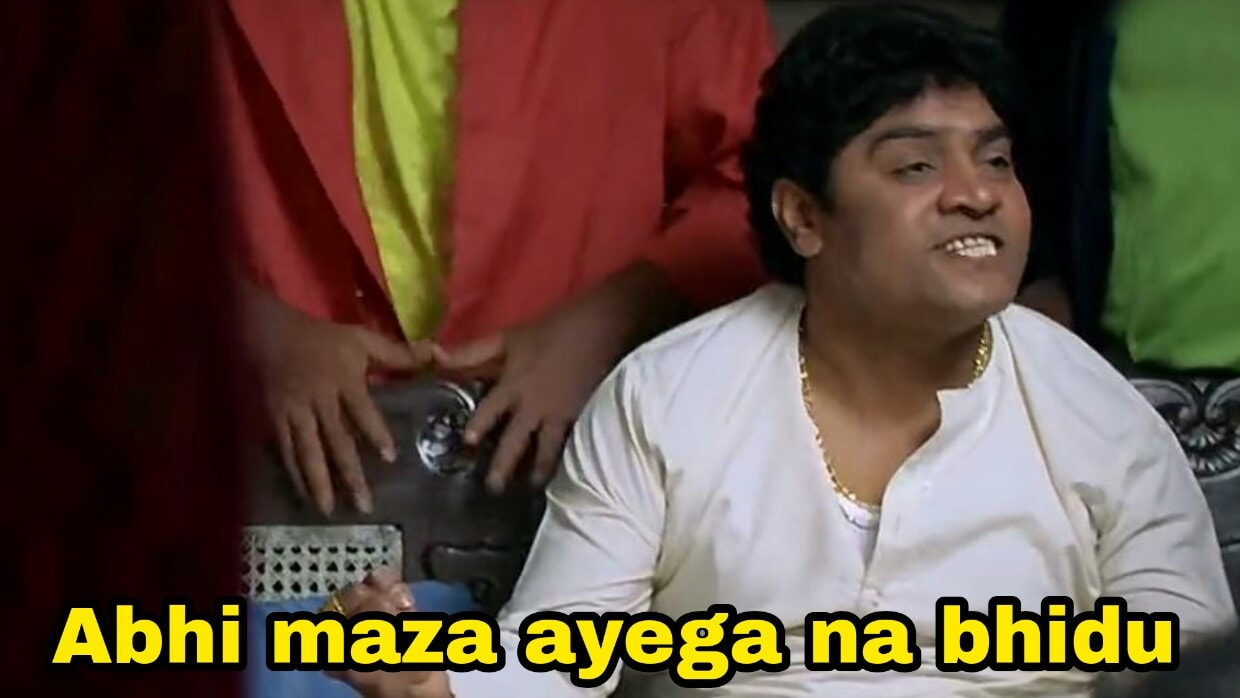

In [9]:
import matplotlib.pyplot  as plt
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score

In [11]:
data = pd.read_csv('Iris.csv')
data.head(5)

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [13]:
data.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

In [15]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [16]:
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
X.head(5)

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2

In [17]:
y = data['Species']
y.head(5)

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [18]:
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [20]:
y.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0,1,2], inplace = True)

In [24]:
y.unique()

array([0, 1, 2], dtype=int64)

In [69]:
data.head(5)

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0

### Setosa

In [103]:
setosa = data[data.values == 0]
setosa.tail(5)

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
45            4.8           3.0            1.4           0.3        0
46            5.1           3.8            1.6           0.2        0
47            4.6           3.2            1.4           0.2        0
48            5.3           3.7            1.5           0.2        0
49            5.0           3.3            1.4           0.2        0

### Versicolor

In [104]:
versicolor = data[data.values == 1]
versicolor.tail(5)

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
95            5.7           3.0            4.2           1.2        1
96            5.7           2.9            4.2           1.3        1
97            6.2           2.9            4.3           1.3        1
98            5.1           2.5            3.0           1.1        1
99            5.7           2.8            4.1           1.3        1

### Verginica 

In [105]:
verginica = data[data.values == 2]
verginica.tail(5)

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
146            6.3           2.5            5.0           1.9        2
147            6.5           3.0            5.2           2.0        2
147            6.5           3.0            5.2           2.0        2
148            6.2           3.4            5.4           2.3        2
149            5.9           3.0            5.1           1.8        2

## Plotting Data

### Setosa Vs Versicolor Vs Verginica - Sepal Length and Width

Text(0.5, 1.0, 'Setosa Vs Versicolor Vs Verginica')

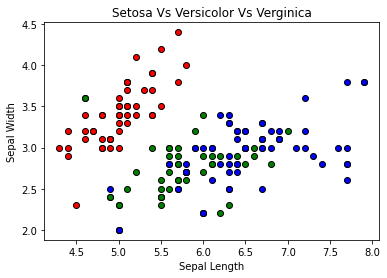

In [107]:
#plt.clf()
plt.scatter(setosa['SepalLengthCm'], setosa['SepalWidthCm'], cmap = plt.cm.Set1, edgecolor = 'k', color = 'r')
plt.scatter(versicolor['SepalLengthCm'], versicolor['SepalWidthCm'], cmap = plt.cm.Set1, edgecolor = 'k', color = 'g')
plt.scatter(verginica['SepalLengthCm'], verginica['SepalWidthCm'], cmap = plt.cm.Set1, edgecolor = 'k', color = 'b')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Setosa Vs Versicolor Vs Verginica') 


### Setosa Vs Versicolor Vs Verginica - Petal Length and Width

Text(0.5, 1.0, 'Setosa Vs Versicolor Vs Verginica')

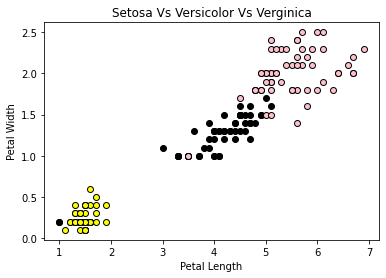

In [124]:
#plt.clf()
plt.scatter(setosa['PetalLengthCm'], setosa['PetalWidthCm'], cmap = plt.cm.Set1, edgecolor = 'k', color = 'yellow')
plt.scatter(versicolor['PetalLengthCm'], versicolor['PetalWidthCm'], cmap = plt.cm.Set1, edgecolor = 'k', color = 'black')
plt.scatter(verginica['PetalLengthCm'], verginica['PetalWidthCm'], cmap = plt.cm.Set1, edgecolor = 'k', color = 'pink')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Setosa Vs Versicolor Vs Verginica') 


### Setosa

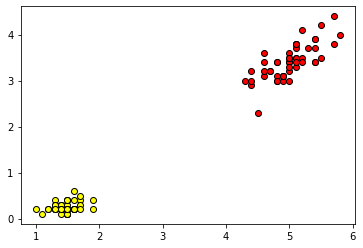

In [126]:
plt.scatter(setosa['SepalLengthCm'], setosa['SepalWidthCm'], cmap = plt.cm.Set1, edgecolor = 'k', color = 'r')
plt.scatter(setosa['PetalLengthCm'], setosa['PetalWidthCm'], cmap = plt.cm.Set1, edgecolor = 'k', color = 'yellow')


### Versicolor

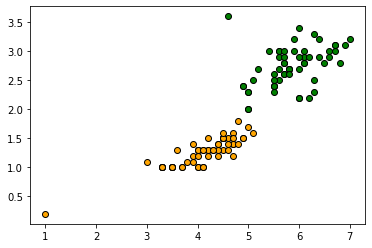

In [117]:
plt.scatter(versicolor['SepalLengthCm'], versicolor['SepalWidthCm'], cmap = plt.cm.Set2, edgecolor = 'k', color = 'g')
plt.scatter(versicolor['PetalLengthCm'], versicolor['PetalWidthCm'], cmap = plt.cm.Set2, edgecolor = 'k', color = 'orange')

### Verginica

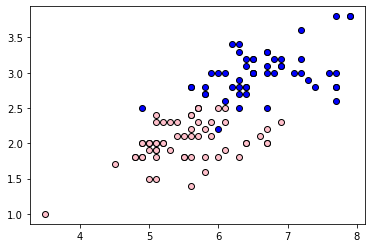

In [119]:
plt.scatter(verginica['SepalLengthCm'], verginica['SepalWidthCm'], cmap = plt.cm.Set3, edgecolor = 'k', color = 'b')
plt.scatter(verginica['PetalLengthCm'], verginica['PetalWidthCm'], cmap = plt.cm.Set3, edgecolor = 'k', color = 'pink')

### Splitting Data

In [189]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, shuffle = True, random_state = 10)

print(f'Shape of Train features : {x_train.shape}')
print(f'Shape of Test features : {x_test.shape}')
print(f'Shape of Train labels : {y_train.shape}')
print(f'Shape of Test labels : {y_test.shape}')

Shape of Train features : (120, 4)
Shape of Test features : (30, 4)
Shape of Train labels : (120,)
Shape of Test labels : (30,)


## Naive Bayes

### Guassian Naive Bayes

#### Follows normal distribution (Guassian Distribution)

In [190]:
from sklearn.naive_bayes import GaussianNB

In [191]:
idiot = GaussianNB()
idiot.fit(x_train, y_train)

GaussianNB()

In [192]:
prediction = idiot.predict(x_test)
print(f'Predictions are: {prediction}')

Predictions are: [1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2]


In [193]:
result = accuracy_score(y_test, prediction)

print(f'Accuracy of our Naive Bayes Model : {result}')

Accuracy of our Naive Bayes Model : 1.0


In [194]:
from sklearn.metrics import confusion_matrix, classification_report

In [195]:
cm = confusion_matrix(y_test, prediction)
print(f'The Confusion Matrix of our model is: \n\n {cm}')

The Confusion Matrix of our model is: 

 [[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]


In [196]:
cr = classification_report(y_test, prediction)
print(f'The Classification Report of our model is: \n\n {cr}')

The Classification Report of our model is: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Multinomial Naive Bayes

In [250]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, shuffle = True, random_state = 10)

print(f'Shape of Train features : {x_train.shape}')
print(f'Shape of Test features : {x_test.shape}')
print(f'Shape of Train labels : {y_train.shape}')
print(f'Shape of Test labels : {y_test.shape}')

Shape of Train features : (120, 4)
Shape of Test features : (30, 4)
Shape of Train labels : (120,)
Shape of Test labels : (30,)


In [251]:
from sklearn.naive_bayes import MultinomialNB

In [252]:
stupid = MultinomialNB()
stupid.fit(x_train, y_train)

MultinomialNB()

In [253]:
stupid_prediction = stupid.predict(x_test)
print(f'Predictions are: {stupid_prediction}')

Predictions are: [2 2 0 2 0 2 2 1 0 2 2 2 2 0 0 2 2 0 0 0 2 2 2 0 2 0 2 2 2 2]


In [254]:
stupid_result = accuracy_score(y_test, prediction)

print(f'Accuracy of our Naive Bayes Model : {stupid_result}')

Accuracy of our Naive Bayes Model : 0.6


In [255]:
from sklearn.metrics import confusion_matrix, classification_report

In [256]:
stupid_cm = confusion_matrix(y_test, prediction)
print(f'The Confusion Matrix of our model is: \n\n {stupid_cm}')

The Confusion Matrix of our model is: 

 [[10  0  0]
 [ 0  1 12]
 [ 0  0  7]]


In [257]:
stupid_cr = classification_report(y_test, prediction)
print(f'The Classification Report of our model is: \n\n {stupid_cr}')

The Classification Report of our model is: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.08      0.14        13
           2       0.37      1.00      0.54         7

    accuracy                           0.60        30
   macro avg       0.79      0.69      0.56        30
weighted avg       0.85      0.60      0.52        30

